In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import csv

#Root of jupyter notebook is /projects/ps-gymreklab/resources/ukbiobank

In [1]:
def loadFreqs(freqLocation, identifyingVCFLocation, cNum, vcfHeaderLines):
    lociToFreqs = {}
    with open('{}/chr{}.afreq'.format(freqLocation, cNum)) as freqFile, \
            open('{}/chr{}.vcf'.format(identifyingVCFLocation, cNum)) as vcfFile:
        freqReader = csv.reader(freqFile, delimiter='\t')
        vcfReader = csv.reader(vcfFile, delimiter='\t')

        #skip header lines
        next(freqReader)
        for _ in range(vcfHeaderLines):
            next(vcfReader)


        count = 0
        for freqRow, vcfRow in zip(freqReader, vcfReader):
            count += 1
            if freqRow[1] != vcfRow[2]:
                print("Mismatched vcf and afreq IDs at variant {}".format(count))
                1/0
            variantKey = tuple(vcfRow[i] for i in[0,1,3,4])
            if variantKey in lociToFreqs:
                print("Already encountered variant {}".format(count))
                1/0
            lociToFreqs[variantKey] = freqRow[4]

            if count % 100000 == 0:
                print("{} Count {}k   ".format(cNum, count/1000), end='\r')
            
    print("Chr {} done                          ".format(cNum), end='\r')
    return lociToFreqs

In [33]:
def graph_entire(title, a, b, c, a2, b2, c2):
    graph_xs = xs[:variantCount]
    graph_ys = ys[:variantCount]
    #plt.hexbin(graph_xs, graph_ys, gridsize=100, cmap='viridis')
    fig, axes = plt.subplots()
    _, _, _, hist = axes.hist2d(graph_xs, graph_ys, bins=50, cmap='viridis', cmin=1, norm=colors.LogNorm())
    line = np.linspace(0, 1, 1000)
    axes.plot(line, line)
    axes.plot(line, a*line**2 + b*line + c, 'r', label="Proposed filtering cutoff")
    axes.plot(line, a2*line**2 + b2*line + c2, 'r')
    fig.colorbar(hist, label='count in bin')
    axes.set_xlabel('SNPSTR allele freqs')
    axes.set_ylabel('UKB hap allele freqs')
    axes.legend()
    axes.set_title(title)
    plt.show()
    
def graph_low_freq(title):
    graph_xs = xs[np.logical_and(xs <= 0.1, ys <= 0.1)][:variantCount]
    graph_ys = ys[np.logical_and(xs <= 0.1, ys <= 0.1)][:variantCount]
    #plt.hexbin(graph_xs, graph_ys, gridsize=100, cmap='viridis')
    fig, axes = plt.subplots()
    _, _, _, hist = axes.hist2d(graph_xs, graph_ys, bins=50, cmap='viridis', cmin=1, norm=colors.LogNorm())
    line = np.linspace(0, 0.1, 1000)
    fig.colorbar(hist, label='count in bin')
    axes.plot(line, line)
    axes.set_xlabel('SNPSTR allele freqs')
    axes.set_ylabel('UKB hap allele freqs')
    axes.set_title(title)
    plt.show()

In [3]:
variantCount = 0
xs = np.zeros(1000000)
ys = np.zeros(1000000)

for cNum in range(1,23):
    snpstrFreqs = loadFreqs("/projects/ps-gymreklab/jmargoli/ukbiobank/pre_imputation_qc/allele_freqs/snpstr",
                            "/projects/ps-gymreklab/jmargoli/ukbiobank/snpstr/vcf_1_sample", cNum, 11)
    hapFreqs = loadFreqs("/projects/ps-gymreklab/jmargoli/ukbiobank/pre_imputation_qc/allele_freqs/hap",
                            "/projects/ps-gymreklab/jmargoli/ukbiobank/microarray/vcf_1_sample", cNum, 6)
    commonKeys = set(snpstrFreqs.keys()).intersection(set(hapFreqs.keys()))
    for key in commonKeys:
        xs[variantCount] = snpstrFreqs[key]
        ys[variantCount] = hapFreqs[key]
        variantCount += 1


/home/jmargoli/anaconda3/envs/ukb_analysis/lib/python3.6/site-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


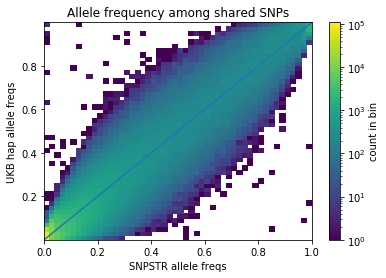

In [4]:
graph_entire('Allele frequency among shared SNPs')

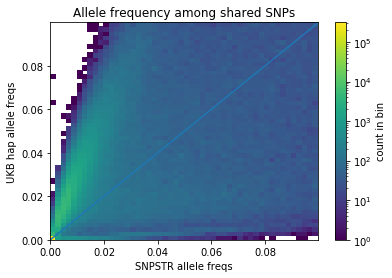

In [6]:
graph_low_freq('Allele frequency among shared SNPs')

In [47]:
variantCount = 0
xs = np.zeros(1000000)
ys = np.zeros(1000000)
commonKeys = set()
hapFreqs = {}
snpstrFreqs = {}

for cNum in range(1,23):
#for cNum in range(22,23):
    hapFreqs.update(loadFreqs("/projects/ps-gymreklab/jmargoli/ukbiobank/pre_imputation_qc/allele_freqs/hap_white_brit_high_quality_sane_kinship_unrelated",
                            "/projects/ps-gymreklab/jmargoli/ukbiobank/microarray/vcf_1_sample", cNum, 6))
    snpstrFreqs.update(loadFreqs("/projects/ps-gymreklab/jmargoli/ukbiobank/pre_imputation_qc/allele_freqs/snpstr_eur",
                            "/projects/ps-gymreklab/jmargoli/ukbiobank/snpstr/vcf_1_sample", cNum, 11))
    newCommonKeys = set(snpstrFreqs.keys()).intersection(set(hapFreqs.keys()))
    for key in newCommonKeys:
        xs[variantCount] = snpstrFreqs[key]
        ys[variantCount] = hapFreqs[key]
        variantCount += 1
    commonKeys = commonKeys.union(newCommonKeys)

MemoryError: 

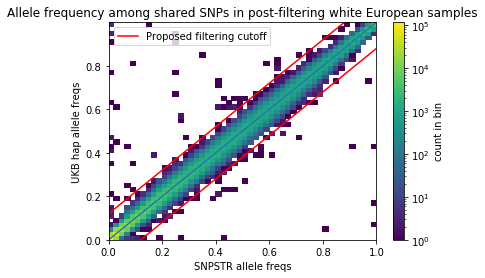

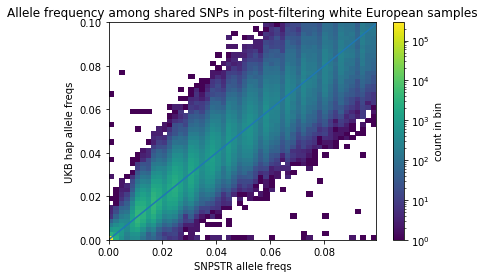

In [34]:
graph_entire('Allele frequency among shared SNPs in post-filtering white European samples', 0, 1, -0.12, 0, 1, 0.12)
graph_low_freq('Allele frequency among shared SNPs in post-filtering white European samples')

In [38]:
filteredSNPs = set()
for key in commonKeys:
    if abs(snpstrFreqs[key] - hapFreqs[key]) > 0.12:
        filtereSNPs.add(key[:2])

('15', '36175182', 'C', 'T')
('7', '61653', 'G', 'A')
('18', '74302463', 'G', 'C')
('3', '132860594', 'A', 'G')
('17', '53399928', 'G', 'A')
('11', '4920889', 'A', 'G')
('8', '127909720', 'A', 'G')
('9', '112219474', 'C', 'G')
('14', '37189871', 'C', 'T')
('11', '91941510', 'T', 'C')
('6', '31026009', 'C', 'T')
('6', '129139128', 'A', 'G')
('12', '79745735', 'C', 'T')
('2', '133196926', 'C', 'T')
('10', '119268054', 'T', 'G')
('6', '116554640', 'G', 'A')
('9', '13846603', 'C', 'T')
('11', '131012407', 'G', 'T')
('1', '63539607', 'C', 'A')
('17', '71547236', 'C', 'T')
('10', '132387267', 'A', 'G')
('19', '50000009', 'G', 'A')
('8', '106121746', 'G', 'A')
('12', '101998300', 'A', 'G')
('16', '62263751', 'T', 'C')
('20', '24139471', 'C', 'T')
('1', '180039613', 'A', 'G')
('2', '159672322', 'C', 'T')
('13', '38859334', 'A', 'G')
('19', '9548788', 'C', 'T')
('5', '139720400', 'T', 'C')
('12', '130904400', 'A', 'G')
('11', '114078134', 'G', 'A')
('8', '109270997', 'C', 'T')
('9', '18536274',